In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("Input.csv") 

In [6]:
data[1:4]

Rank      SenatorName      Votes   % Votes Wiki? Google? Newapi?  \
1     2  Loretta+Sanchez  1,416,203  0.188517   Yes     Yes     Yes   
2     3     Duf+Sundheim    584,251  0.077772   Yes      No      No   
3     4       Phil+Wyman    352,821  0.046966   Yes     Yes     Yes   

         DOB                       Education1  \
1   7-Jan-60               Chapman University   
2  11-Dec-52              Stanford University   
3   1-Feb-45  University of california, Davis   

                              Education2        ...        OrgsOfInfluence?  \
1                    American University        ...                     NaN   
2  Northwestern University School of Law        ...                     NaN   
3                                    NaN        ...                     NaN   

  #Events  EventsOfImportance?  WikiCareerSuccessScore  WikiGeneric  \
1       3                  NaN                     NaN          NaN   
2       0                  NaN                     NaN          NaN   
3       3                  NaN                     NaN          NaN   

   #Articles  ArticleInfluenceScore  #PostiveArticles  #NegativeArticles  \
1          6                    NaN               NaN                NaN   
2          0                    NaN               NaN                NaN   
3          5                    NaN               NaN                NaN   

   #NeutralArticles  
1               NaN  
2               NaN  
3               NaN  

[3 rows x 23 columns]

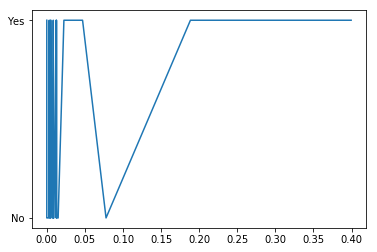

In [7]:
plt.plot(data['% Votes'],data['Google?'])

In [8]:
selectdata = data[['SenatorName','% Votes','Wiki?','Google?','Occupation1',' #Orgs','#Events','#Articles']]

In [8]:
selectdata[1:2]

SenatorName   % Votes Wiki? Google? Occupation1   #Orgs  #Events  \
1  Loretta+Sanchez  0.188517   Yes     Yes  Politician       3        3   

   #Articles  
1          6

In [9]:
import seaborn as sns

In [10]:
sns.set(style="ticks")

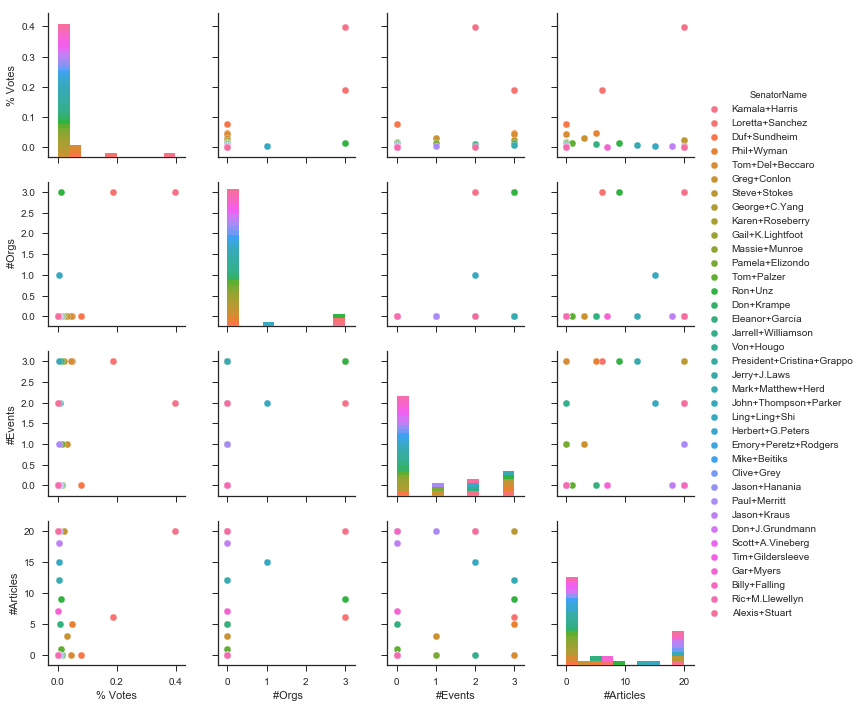

In [11]:
sns.pairplot(selectdata, hue="SenatorName")

In [12]:
selectdatacluster = selectdata.drop(['% Votes','Occupation1','Wiki?','Google?','SenatorName'], axis=1)

In [13]:
selectdatacluster = pd.Series(testcluster,dtype='float')

NameError: name 'testcluster' is not defined

In [14]:
import random
random.uniform(0, 1)

0.017639844921659042

In [15]:
testcluster

NameError: name 'testcluster' is not defined

In [16]:
testcluster = np.array(selectdatacluster,dtype=float)

for i in range(0,len(testcluster)):
    testcluster[i][0] = float(testcluster[i][0]) + random.uniform(0, 0.25)
    testcluster[i][1] = testcluster[i][1] + random.uniform(0, 0.25)
    testcluster[i][2] = testcluster[i][2] + random.uniform(0, 0.25)

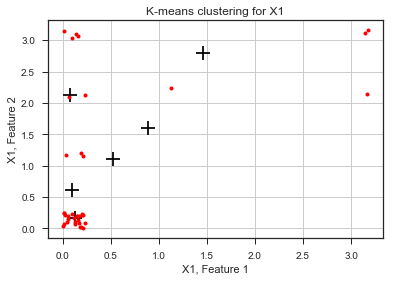

In [17]:
from sklearn.cluster import KMeans
import random

# run kmeans algorithm (this is the most traditional use of k-means)
kmeans = KMeans(init='random', # initialization
        n_clusters=6,  # number of clusters
        n_init=1,       # number of different times to run k-means
        n_jobs=-1)

kmeans.fit(testcluster)

# visualize the data
centroids = kmeans.cluster_centers_
plt.plot(testcluster[:, 0], testcluster[:, 1], 'r.', markersize=8) #plot the data
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='+', s=200, linewidths=3, color='k')  # plot the centroids
plt.title('K-means clustering for X1')
plt.xlabel('X1, Feature 1')
plt.ylabel('X1, Feature 2')
plt.grid()
plt.show()

In [18]:
selectdatacluster = selectdatacluster.astype(float)

In [19]:
for i in range(0,len(selectdatacluster)):
    selectdatacluster[:i][' #Orgs'] = selectdatacluster[:i][' #Orgs'] + random.uniform(0, 0.25)
    selectdatacluster[:i]['#Events'] = selectdatacluster[:i]['#Events'] + random.uniform(0, 0.25)
    selectdatacluster[:i]['#Articles'] = selectdatacluster[:i]['#Articles'] + random.uniform(0, 0.25)
    
    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [20]:
selectdatacluster[0:3]

#Orgs   #Events  #Articles
0  8.240006  6.027587  24.667527
1  8.119301  7.000525  10.639144
2  4.905894  3.758071   4.632967

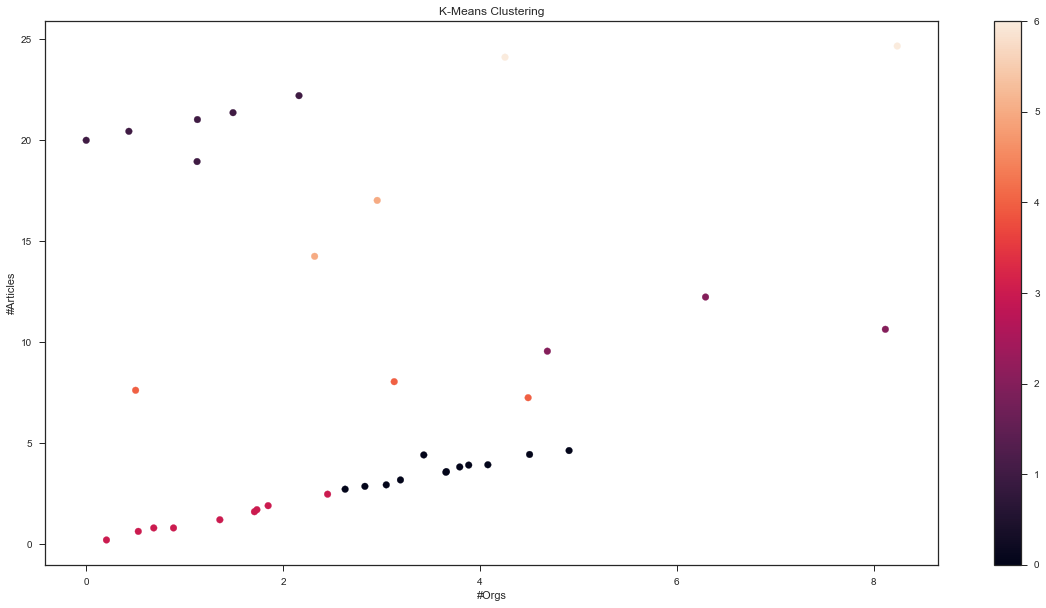

In [21]:
def doKmeans(X, nclust=3):
  model = KMeans(nclust)
  model.fit(X)
  clust_labels = model.predict(X)
  cent = model.cluster_centers_
  return (clust_labels, cent)

clust_labels, cent = doKmeans(selectdatacluster,7)
kmeans = pd.DataFrame(clust_labels)
#selectdatacluster.insert((selectdatacluster.shape[1]),'kmeans',kmeans)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(selectdatacluster[' #Orgs'],selectdatacluster['#Articles'],
  c=kmeans[0],s=45)
ax.set_title('K-Means Clustering')
ax.set_xlabel('#Orgs')
ax.set_ylabel('#Articles')
plt.colorbar(scatter)


In [22]:
selectdatacluster.drop('kmeans',axis=1)

ValueError: labels ['kmeans'] not contained in axis

In [23]:
selectdatacluster

#Orgs   #Events  #Articles
0   8.240006  6.027587  24.667527
1   8.119301  7.000525  10.639144
2   4.905894  3.758071   4.632967
3   4.685231  6.654388   9.554907
4   4.504620  6.621877   4.439824
5   4.489920  4.406090   7.251267
6   4.255096  6.223086  24.114820
7   4.080647  2.983107   3.929671
8   3.886054  2.977277   3.913615
9   3.794828  2.969473   3.820932
10  3.659404  2.911018   3.591121
11  3.654083  3.801514   3.559264
12  3.429833  2.703459   4.416378
13  6.292398  5.558141  12.236773
14  3.192830  2.421081   3.178590
15  3.129207  2.307898   8.044733
16  3.048506  4.291835   2.935080
17  2.831355  2.267854   2.861006
18  2.630611  2.166907   2.720386
19  2.452384  1.979034   2.472569
20  2.320743  4.941127  14.253009
21  2.162008  1.905114  22.210741
22  2.956593  3.823003  17.022956
23  1.848371  1.741119   1.903920
24  1.734213  1.524186   1.704769
25  1.709210  1.294124   1.603756
26  1.491648  1.143128  21.367957
27  1.357758  1.081016   1.206846
28  1.129936  1.881482  21.026156
29  1.126524  0.865634  18.946218
30  0.887120  0.741977   0.801310
31  0.686235  0.578669   0.801220
32  0.529209  0.373129   0.631612
33  0.501963  0.372929   7.618904
34  0.433540  0.265839  20.444358
35  0.205899  0.133493   0.205327
36  0.000000  2.000000  20.000000

In [23]:
selectdata = data[['SenatorName','% Votes','Wiki?','Google?','Occupation1',' #Orgs','#Events','#Articles']]

In [24]:
selectdata
type(selectdata)

pandas.core.frame.DataFrame

In [25]:
selectdata.head()
df_select = selectdata
df_select.head()

SenatorName   % Votes Wiki? Google? Occupation1   #Orgs  #Events  \
0    Kamala+Harris  0.399436   Yes     Yes  Politician       3        2   
1  Loretta+Sanchez  0.188517   Yes     Yes  Politician       3        3   
2     Duf+Sundheim  0.077772   Yes      No  Politician       0        0   
3       Phil+Wyman  0.046966   Yes     Yes  Politician       0        3   
4  Tom+Del+Beccaro  0.043078   Yes     Yes  Politician       0        3   

   #Articles  
0         20  
1          6  
2          0  
3          5  
4          0

In [26]:
df_select.rename(columns={'Wiki?':'Wiki'},inplace=True)
df_select.rename(columns={'Google?':'Google'},inplace=True)
df_select.rename(columns={'% Votes':'Votes'},inplace=True)

df_select.rename(columns={' #Orgs':'NumOrgs'},inplace=True)
df_select.rename(columns={'#Events':'NumEvents'},inplace=True)
df_select.rename(columns={'#Articles':'NumArticles'},inplace=True)

df_select.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


SenatorName     Votes Wiki Google Occupation1  NumOrgs  NumEvents  \
0    Kamala+Harris  0.399436  Yes    Yes  Politician        3          2   
1  Loretta+Sanchez  0.188517  Yes    Yes  Politician        3          3   
2     Duf+Sundheim  0.077772  Yes     No  Politician        0          0   
3       Phil+Wyman  0.046966  Yes    Yes  Politician        0          3   
4  Tom+Del+Beccaro  0.043078  Yes    Yes  Politician        0          3   

   NumArticles  
0           20  
1            6  
2            0  
3            5  
4            0

In [13]:
#df_select.Wiki.replace(('yes', 'no'), (1, 0,), inplace=True)
#> 30 = 1; 10-30 = 2; 5-10 = 3; 0-5 = 4
#pd.cut(df_select['Votes'], bins=[0, 5, 10, 30], include_lowest=True)
#df_select['Votes'] = pd.cut(df_select['Votes'], bins=[0, 0.05, 0.10, 0.30, 1], include_lowest=True, labels=['0', '1', '2', '3'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [27]:
df_select.head()
df1 = df_select

In [28]:
df1 = df_select
df1.head()

SenatorName     Votes Wiki Google Occupation1  NumOrgs  NumEvents  \
0    Kamala+Harris  0.399436  Yes    Yes  Politician        3          2   
1  Loretta+Sanchez  0.188517  Yes    Yes  Politician        3          3   
2     Duf+Sundheim  0.077772  Yes     No  Politician        0          0   
3       Phil+Wyman  0.046966  Yes    Yes  Politician        0          3   
4  Tom+Del+Beccaro  0.043078  Yes    Yes  Politician        0          3   

   NumArticles  
0           20  
1            6  
2            0  
3            5  
4            0

In [29]:
df1['Wiki'] = df1.Wiki.map(dict(Yes=1, No=0))
df1['Google'] = df1.Google.map(dict(Yes=1, No=0))
df1.head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


SenatorName     Votes  Wiki  Google Occupation1  NumOrgs  NumEvents  \
0     Kamala+Harris  0.399436     1       1  Politician        3          2   
1   Loretta+Sanchez  0.188517     1       1  Politician        3          3   
2      Duf+Sundheim  0.077772     1       0  Politician        0          0   
3        Phil+Wyman  0.046966     1       1  Politician        0          3   
4   Tom+Del+Beccaro  0.043078     1       1  Politician        0          3   
5       Greg+Conlon  0.030742     0       1         NaN        0          1   
6      Steve+Stokes  0.022470     0       1         NaN        0          3   
7     George+C.Yang  0.014916     0       0         NaN        0          0   
8   Karen+Roseberry  0.014717     0       0         NaN        0          0   
9  Gail+K.Lightfoot  0.013280     0       0         NaN        0          0   

   NumArticles  
0           20  
1            6  
2            0  
3            5  
4            0  
5            3  
6           20  
7            0  
8            0  
9            0

In [18]:
df1.info() # now our data looks better!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
SenatorName    37 non-null object
Votes          37 non-null category
Wiki           37 non-null int64
Google         37 non-null int64
Occupation1    5 non-null object
NumOrgs        37 non-null int64
NumEvents      37 non-null int64
NumArticles    37 non-null int64
dtypes: category(1), int64(5), object(2)
memory usage: 2.3+ KB


In [31]:
#One-hot encoding 
#Useful link: http://pbpython.com/categorical-encoding.html
df2 = df1
df2 = df2.drop(['SenatorName','Occupation1'], axis=1)
df2.head()
#df2 = pd.get_dummies(df1, columns=["SenatorName", "Occupation1"], prefix=["Senator", "Occ"]).head()

Votes  Wiki  Google  NumOrgs  NumEvents  NumArticles
0  0.399436     1       1        3          2           20
1  0.188517     1       1        3          3            6
2  0.077772     1       0        0          0            0
3  0.046966     1       1        0          3            5
4  0.043078     1       1        0          3            0

In [32]:
#df2['Votes'] = df2['Votes'].astype('int')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
Votes          37 non-null float64
Wiki           37 non-null int64
Google         37 non-null int64
NumOrgs        37 non-null int64
NumEvents      37 non-null int64
NumArticles    37 non-null int64
dtypes: float64(1), int64(5)
memory usage: 1.8 KB


### Random Forest

In [117]:
#https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/
#Using H20
#https://github.com/h2oai/h2o-tutorials/blob/master/tutorials/gbm-randomforest/GBM_RandomForest_Example.py
# Example from the Git shows H2O implementation of Random forest that would not need one-hot encoding
#import h2o
#import os

#Other useful Links: https://www.blopig.com/blog/2017/07/using-random-forests-in-python-with-scikit-learn/


In [33]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'Votes' in df2:
    y = df2['Votes'].values # get the labels we want
    #del df_select['elf'] # get rid of the class label
    X= df2[df2.columns.difference(['Votes'])].values
    #X = df_select.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
# create cross validation iterator
#cv_object = ShuffleSplit(n_splits=2)

CPU times: user 233 ms, sys: 109 ms, total: 342 ms
Wall time: 571 ms


In [34]:
#https://www.blopig.com/blog/2017/07/using-random-forests-in-python-with-scikit-learn/
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
#scaler = StandardScaler().fit(X_train)
#X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
#X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [35]:
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=150, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [36]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate:  0.53
Test data R-2 score: -21.8
Test data Spearman correlation: 0.773
Test data Pearson correlation: 0.296


In [42]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_test, predicted_test))

0.0041227453111599656


In [50]:
d = {'Actual Value': y_test*100, 'Predicted Value':predicted_test*100 }
results = pd.DataFrame(data=d)
results

Actual Value  Predicted Value
0      0.846729         0.742934
1      1.228981        19.172042
2      4.307776         6.743827
3      0.257151         0.739715
4      0.000426         0.742934
5      0.418646         0.742934
6      2.247042         1.292832
7      0.391597         0.739715

### Hyperparameter optmization

In [ ]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
X = bank_regression['X']
y = bank_regression['y']
#seed=0
#n_splits = 4
#yhat = np.zeros(y.shape)
#cv = KFold(n_splits=n_splits, random_state=seed)

for max_depth in range(1, 100)[::20]:
  for train_index, test_index in cv.split(X, y):
  clf = RandomForestRegressor(max_depth=max_depth, n_estimators=5, random_state=seed, n_jobs=2)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  clf.fit(X_train, y_train)
  yhat[test_index] = clf.predict(X_test)
  print("max_depth: %.f, MSE: %.f, R^2: %0.4f" % (max_depth, mean_squared_error(y, yhat), r2_score(y, yhat)))

In [39]:
from sklearn import metrics as mt

total_accuracy = mt.accuracy_score(y_test, predicted_test)
print(total_accuracy)

ValueError: continuous is not supported

### METHOD 2 for Random Forest

In [41]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'Votes' in df2:
    y = df2['Votes'].values # get the labels we want
    #del df_select['elf'] # get rid of the class label
    X= df2[df2.columns.difference(['Votes'])].values
    #X = df_select.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
# create cross validation iterator
cv_object = StratifiedKFold(n_splits=2)

CPU times: user 1.27 ms, sys: 68 µs, total: 1.33 ms
Wall time: 1.28 ms


In [40]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
## X_train , y_train , X_test, y_test (they were set in a for loop above)

for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]

NameError: name 'cv_object' is not defined

In [143]:
X_train

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 6, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [1, 5, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [140]:
print(train_indices, test_indices)

[2 1 4 3] [0]


In [141]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)  # train object
y_hat = RFR.predict(X_test)

In [142]:
total_accuracy = mt.accuracy_score(y_test, y_hat)
print ('RandomForest', total_accuracy)
conf = mt.confusion_matrix(y_test,y_hat)
print(conf)
print(classification_report(y_test, y_hat8))

RandomForest 0.0
[[0 0]
 [1 0]]


NameError: name 'classification_report' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X, y = make_regression(n_features=4, n_informative=2,
...                        random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

print(regr.feature_importances_)
#[ 0.17339552  0.81594114  0.          0.01066333]
print(regr.predict([[0, 0, 0, 0]]))
#[-2.50699856]

#### KNN

In [60]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'Votes' in df_select:
    y = df_select['Votes'].values # get the labels we want
    #del df_select['elf'] # get rid of the class label
    X= df_select[df_select.columns.difference(['Votes'])].values
    #X = df_select.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
# create cross validation iterator
cv_object = StratifiedKFold(n_splits=2)

CPU times: user 1.65 ms, sys: 156 µs, total: 1.8 ms
Wall time: 1.7 ms


In [64]:
cv_object
X

array([[3, 20, 2, 'Yes', 'Politician', 'Kamala+Harris', 'Yes'],
       [3, 6, 3, 'Yes', 'Politician', 'Loretta+Sanchez', 'Yes'],
       [0, 0, 0, 'No', 'Politician', 'Duf+Sundheim', 'Yes'],
       [0, 5, 3, 'Yes', 'Politician', 'Phil+Wyman', 'Yes'],
       [0, 0, 3, 'Yes', 'Politician', 'Tom+Del+Beccaro', 'Yes'],
       [0, 3, 1, 'Yes', nan, 'Greg+Conlon', 'No'],
       [0, 20, 3, 'Yes', nan, 'Steve+Stokes', 'No'],
       [0, 0, 0, 'No', nan, 'George+C.Yang', 'No'],
       [0, 0, 0, 'No', nan, 'Karen+Roseberry', 'No'],
       [0, 0, 0, 'No', nan, 'Gail+K.Lightfoot', 'No'],
       [0, 0, 0, 'No', nan, 'Massie+Munroe', 'No'],
       [0, 0, 1, 'Yes', nan, 'Pamela+Elizondo', 'No'],
       [0, 1, 0, 'No', nan, 'Tom+Palzer', 'No'],
       [3, 9, 3, 'Yes', nan, 'Ron+Unz', 'No'],
       [0, 0, 0, 'No', nan, 'Don+Krampe', 'No'],
       [0, 5, 0, 'No', nan, 'Eleanor+García', 'No'],
       [0, 0, 2, 'Yes', nan, 'Jarrell+Williamson', 'No'],
       [0, 0, 0, 'No', nan, 'Von+Hougo', 'No'],
       [0

In [62]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
## X_train , y_train , X_test, y_test (they were set in a for loop above)

for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


ValueError: could not convert string to float: 'No'